In [3]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_labels = pd.read_csv('../datasets/train_labels.csv')

In [5]:
train_values = pd.read_csv('../datasets/train_values.csv')

In [6]:
numero_pisos = train_values[['building_id','count_floors_pre_eq']]

In [81]:
numero_pisos = train_labels\
    .merge(numero_pisos, how='inner')\
    .rename(columns={'count_floors_pre_eq':'Número de pisos'})

In [91]:
grado_danio_segun_numero_pisos = numero_pisos\
    .groupby(['Número de pisos','damage_grade'])\
    .agg('count')\
    .reset_index()

total_buildings_by_floor = numero_pisos[['Número de pisos', 'building_id']]\
    .groupby('Número de pisos')\
    .count()\
    .reset_index()\
    .rename(columns= { 'building_id': 'total_buildings_by_floor' } )

grado_danio_segun_numero_pisos = grado_danio_segun_numero_pisos\
    .merge(total_buildings_by_floor)

grado_danio_segun_numero_pisos['percentage'] = (grado_danio_segun_numero_pisos['building_id'] * 100) / grado_danio_segun_numero_pisos['total_buildings_by_floor']
grado_danio_segun_numero_pisos[['Número de pisos', 'damage_grade', 'percentage']]

,Número de pisos,damage_grade,percentage
0,1,1,22.18
1,1,2,51.43
2,1,3,26.39
3,2,1,8.04
4,2,2,60.00
5,2,3,31.96
6,3,1,4.56
7,3,2,51.21
8,3,3,44.23
9,4,1,13.03


In [92]:
grado_danio_segun_numero_pisos = grado_danio_segun_numero_pisos\
    .pivot(index='Número de pisos', columns='damage_grade',values='percentage')

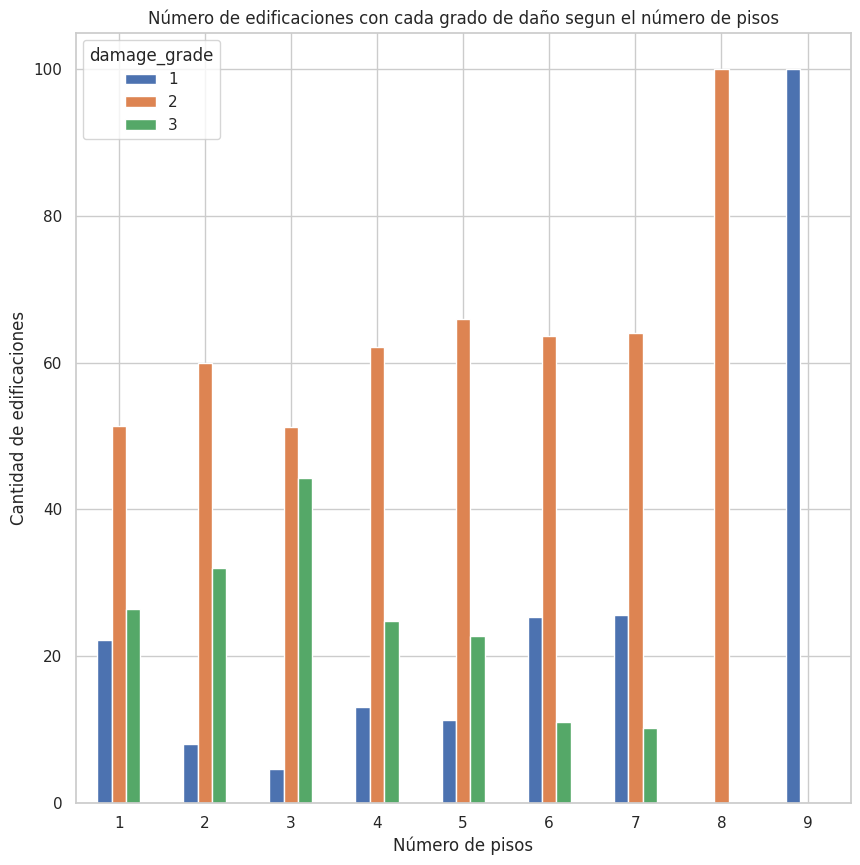

In [93]:
grado_danio_segun_numero_pisos.plot(kind='bar',figsize=(10,10),\
                                    rot=0,title='Número de edificaciones con cada grado de daño segun el número de pisos')
ax=plt.gca()
ax.set_xlabel('Número de pisos')
ax.set_ylabel('Cantidad de edificaciones');

Vemos que la gran mayoria de edificaciones en Nepal tienen dos pisos.

Ahora analizaremos los tipos de cimientos usados en las edificaciones de dos pisos

In [20]:
edificaciones_dos_pisos = train_values.loc[(train_values['count_floors_pre_eq']==2),['building_id','foundation_type']]

In [21]:
edificaciones_dos_pisos = train_labels.merge(edificaciones_dos_pisos)

In [22]:
edificaciones_dos_pisos = edificaciones_dos_pisos.groupby(['foundation_type','damage_grade']).count()\
.rename(columns={'building_id':'total_edificaciones'})
edificaciones_dos_pisos

total_edificaciones
foundation_type damage_grade                     
h               1                             124
                2                             333
                3                             333
i               1                            1882
                2                            1534
                3                              66
r               1                            6603
                2                           80937
                3                           47563
u               1                            1323
                2                            3963
                3                            1121
w               1                            2661
                2                            7201
                3                             979

In [23]:
edificaciones_dos_pisos = edificaciones_dos_pisos.reset_index().\
 pivot(index='foundation_type', columns='damage_grade',values='total_edificaciones')
edificaciones_dos_pisos

damage_grade,1,2,3
foundation_type,,,
h,124,333,333
i,1882,1534,66
r,6603,80937,47563
u,1323,3963,1121
w,2661,7201,979


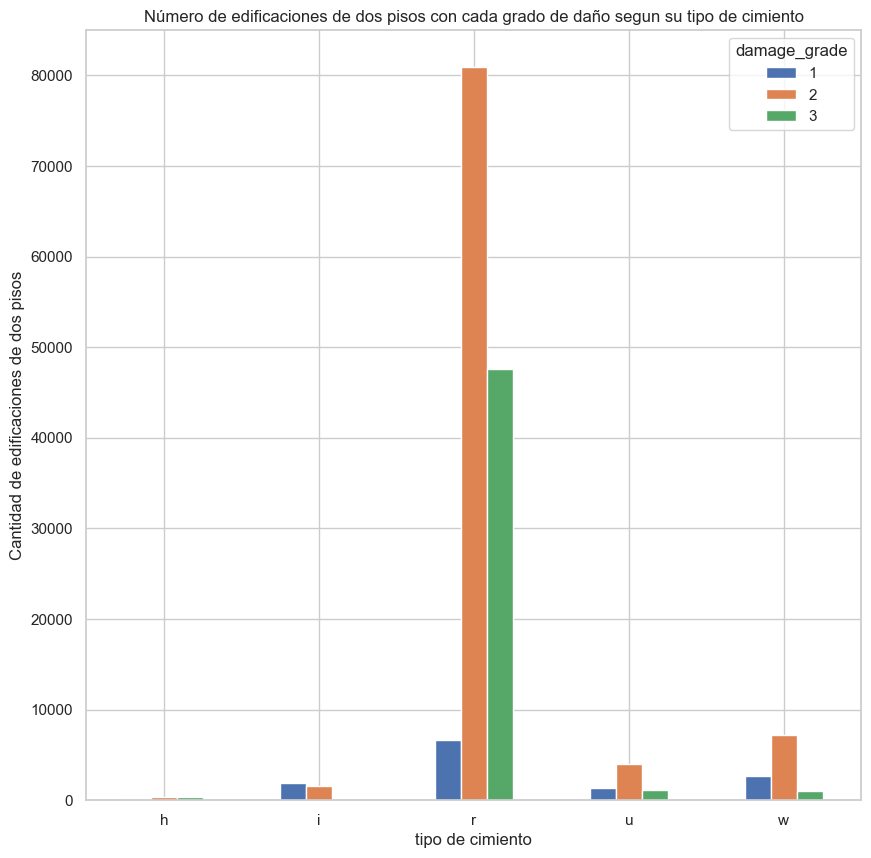

In [14]:
edificaciones_dos_pisos.plot(kind='bar',figsize=(10,10),\
                                    rot=0,title='Número de edificaciones de dos pisos con cada grado de daño segun su tipo de cimiento')
ax=plt.gca()
ax.set_xlabel('tipo de cimiento')
ax.set_ylabel('Cantidad de edificaciones de dos pisos');